## Quantum Broadcasting of An Arbitary n-Qubit Cluster State: Quantum Noise Analysis Using Quantum State Tomography Via IBMQ Simulation


Yousef Mafi$^{1}$. Ali Kookani$^{2}$. 

$^{1}$ Department of Electrical and Computer Engineering, University of Tehran, Tehran, Iran.

$^{2}$ Department of Engineering, College of Farabi, University of Tehran, Tehran, Iran

**Abstract**

This study focuses on the challenges posed by quantum noise to communication protocols, with a particular emphasis on the vulnerabilities of current quantum broadcast protocols. The research employs cluster states, known for their multipartite entanglement, as diagnostic tools to understand and address the impact of quantum noise on transmitted information. Implementing two novel controlled quantum broadcasting protocols on the IBM Quantum Experience platform, using Qiskit and the QASM simulator, the investigation evaluates the effects of Amplitude-damping (AD) and Phase-damping (PD) noises through Kraus operator models. A notable aspect of the study is the pioneering use of quantum state tomography for a comprehensive analysis of quantum noise effects, providing novel insights into the robustness of quantum communication protocols.

**Keywords**: Quantum Broadcast Protocol. IBMQ. Qiskit. Quantum Noise. Quantum State Tomography.



In [ ]:
# Import necessary libraries and modules
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from numpy import pi, random
from math import sqrt, atan2, cos, sin, pow
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from qiskit.extensions import *
from qiskit.circuit.library.standard_gates import RYGate
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError
import qiskit_aer.noise as noise
from qiskit.providers.aer.noise import amplitude_damping_error, phase_damping_error, phase_amplitude_damping_error

In [103]:
# Define desired states
theta = pi/6
a = sqrt(1/2)*(cos(theta/2)+sin(theta/2))
b = sqrt(1/2)*(cos(theta/2)-sin(theta/2))

# Define U_M operator
rows, cols = (16, 16)
arr = [[0]*cols]*rows

U_M = np.array(arr)
for x in range(16): 
    U_M[x,x] = 1

U_M=np.float64(U_M)

U_M[0,0]  = a**2
U_M[3,0]  = a*b
U_M[12,0] = a*b
U_M[15,0] = b**2

U_M[0,3]  = a*b
U_M[3,3]  = -a**2
U_M[12,3] = b**2
U_M[15,3] = -a*b

U_M[0,12]  = a*b
U_M[3,12]  = b**2
U_M[12,12] = -a**2
U_M[15,12] = -a*b

U_M[0,15]  = b**2
U_M[3,15]  = -a*b
U_M[12,15] = -a*b
U_M[15,15] = a**2

U_M_gate = UnitaryGate(U_M,label='Um')

# Define Classica and Quantum bits
q = QuantumRegister(8, 'q')
c = ClassicalRegister(8,'c')
Qc = QuantumCircuit(q,c)

# Prepare GHZ states
Qc.h(q[0])
Qc.cx(q[0],q[1])
Qc.h(q[2])
Qc.cx(q[2],q[3])
Qc.cx(q[0],q[4])
Qc.cx(q[1],q[5])
Qc.cx(q[2],q[6])
Qc.cx(q[3],q[7])
Qc.barrier(q)

# Change basis measurement to the orthonormal basis {|ξ(0)⟩, |ξ(1)⟩, |ξ(2)⟩, |ξ(3)⟩}
Qc.append(U_M_gate, [q[0], q[1],q[2], q[3]])

# Measure Alice's qubits
Qc.measure(q[0],c[0])
Qc.measure(q[1],c[1])
Qc.measure(q[2],c[2])
Qc.measure(q[3],c[3])
Qc.barrier(q)

# Apply U gate on Bob and Chalie's qubits qubits
# Measurement Results: |ξ(0)⟩
# No-action

# Measurement Results: |ξ(1)⟩
Qc.z(q[4]).c_if(c,3)
Qc.x(q[4]).c_if(c,3)
Qc.x(q[5]).c_if(c,3)

# Measurement Results: |ξ(2)⟩
Qc.z(q[6]).c_if(c,12)
Qc.x(q[6]).c_if(c,12)
Qc.x(q[7]).c_if(c,12)

# Measurement Results: |ξ(3)⟩
Qc.z(q[4]).c_if(c,15)
Qc.z(q[6]).c_if(c,15)
Qc.x(q[4]).c_if(c,15)
Qc.x(q[5]).c_if(c,15)
Qc.x(q[6]).c_if(c,15)
Qc.x(q[7]).c_if(c,15)

Qc.barrier(q)

# Measure Bob and Charlie's qubits
Qc.measure(q[4],c[4])
Qc.measure(q[5],c[5])
Qc.measure(q[6],c[6])
Qc.measure(q[7],c[7])

print(Qc)

     ┌───┐                          ░ ┌─────┐┌─┐          ░               »
q_0: ┤ H ├──■────■──────────────────░─┤0    ├┤M├──────────░───────────────»
     └───┘┌─┴─┐  │                  ░ │     │└╥┘┌─┐       ░               »
q_1: ─────┤ X ├──┼────■─────────────░─┤1    ├─╫─┤M├───────░───────────────»
     ┌───┐└───┘  │    │             ░ │  Um │ ║ └╥┘┌─┐    ░               »
q_2: ┤ H ├──■────┼────┼────■────────░─┤2    ├─╫──╫─┤M├────░───────────────»
     └───┘┌─┴─┐  │    │    │        ░ │     │ ║  ║ └╥┘┌─┐ ░               »
q_3: ─────┤ X ├──┼────┼────┼────■───░─┤3    ├─╫──╫──╫─┤M├─░───────────────»
          └───┘┌─┴─┐  │    │    │   ░ └─────┘ ║  ║  ║ └╥┘ ░  ┌───┐  ┌───┐ »
q_4: ──────────┤ X ├──┼────┼────┼───░─────────╫──╫──╫──╫──░──┤ Z ├──┤ X ├─»
               └───┘┌─┴─┐  │    │   ░         ║  ║  ║  ║  ░  └─╥─┘  └─╥─┘ »
q_5: ───────────────┤ X ├──┼────┼───░─────────╫──╫──╫──╫──░────╫──────╫───»
                    └───┘┌─┴─┐  │   ░         ║  ║  ║  ║  ░    ║      ║   »
q_6: ───────

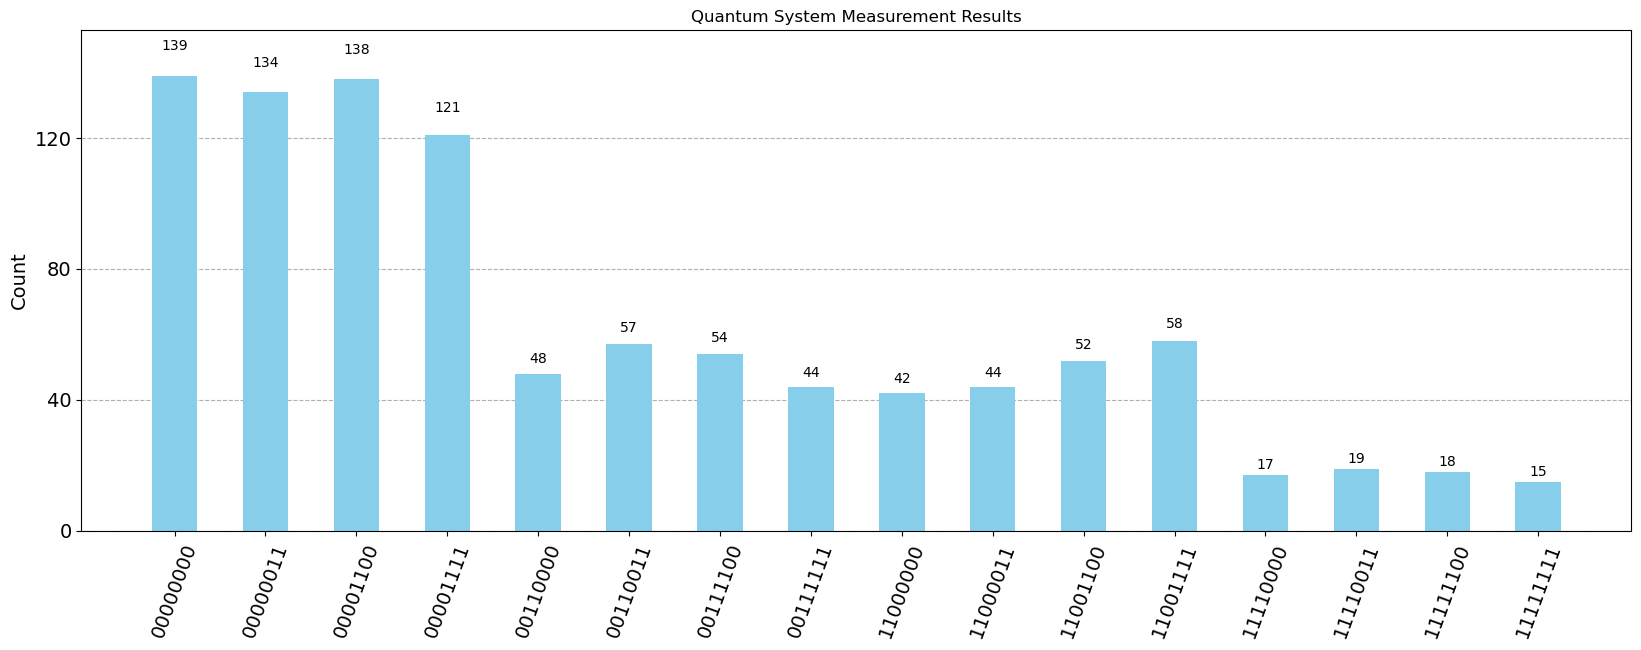

In [104]:
# Set the number of shots for the simulation
m = 1000

# Choose the QasmSimulator for the simulation
simulator = QasmSimulator()

# Transpile the quantum circuit for execution on the simulator
circ = transpile(Qc, simulator)

# Run the simulation with the specified number of shots
result = simulator.run(circ, shots=m).result()

# Obtain the measurement outcomes and their counts
counts = result.get_counts(circ)

# Display the histogram of measurement outcomes
# You can adjust the figure size using the second argument in plot_histogram
# [20, 6.5] specifies the width and height of the figure
plot_histogram(counts, [20, 6.5],title='Quantum System Measurement Results',color='skyblue')

|φ> = α|00> + β|11>
α =  0.8660254037844386
β =  0.5000000000000001
------------------------------------------------------
Measurement results:
|C1C2>=  {'00': 735.0, '01': 0.0, '10': 0.0, '11': 265.0}
The broadcasted state:
|φ_Charlie> = |C1C2>= α_c|00> + β_c|11>
α_c =  0.8573214099741123
β_c =  0.51478150704935


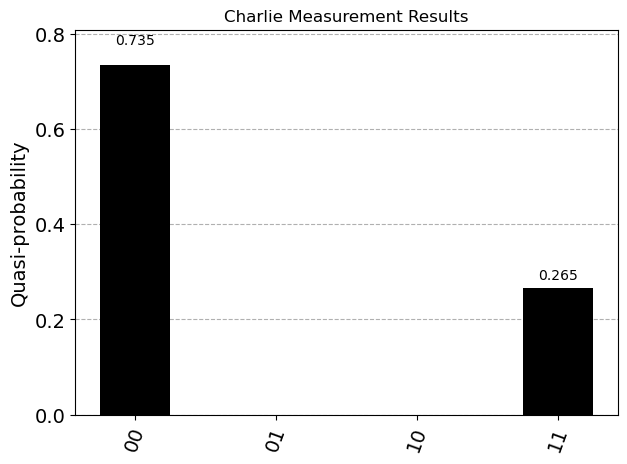

In [105]:
# Initialize an array to store counts for different states
S_C = np.zeros([4])

# Count occurrences of different states based on measurement outcomes
for state in counts:
    if (state[0] == '0') and (state[1] == '0'):
        S_C[0] = S_C[0] + counts[state]
    if (state[0] == '0') and (state[1] == '1'):
        S_C[1] = S_C[1] + counts[state]
    if (state[0] == '1') and (state[1] == '0'):
        S_C[2] = S_C[2] + counts[state]
    if (state[0] == '1') and (state[1] == '1'):
        S_C[3] = S_C[3] + counts[state]

# Create a dictionary to store counts for specific states
count_Charlie = {'00': S_C[0], '01': S_C[1], '10': S_C[2], '11': S_C[3]}

# Display information about the initial state and measurement results
print('|φ> = α|00> + β|11>')
print('α = ', a)
print('β = ', b)
print('------------------------------------------------------')
print('Measurement results:')
print('|C1C2>= ', count_Charlie)
print('The broadcasted state:')
print('|φ_Charlie> = |C1C2>= α_c|00> + β_c|11>')
print('α_c = ', sqrt(count_Charlie['00'] / m))
print('β_c = ', sqrt(count_Charlie['11'] / m))

# Display a histogram of measurement outcomes for Charlie's qubits
plot_histogram(count_Charlie, title='Charlie Measurement Results',color='#000000')


The desired state:
|φ> = α|00> + β|11>
α =  0.8660254037844386
β =  0.5000000000000001
------------------------------------------------------
Measurement results:
|B1B2>=  {'00': 728.0, '01': 0.0, '10': 0.0, '11': 272.0}
The broadcasted state:
|φ_Bob> = |B1B2>= α_b|00> + β_b|11>
α_b =  0.8532291603080616
β_b =  0.521536192416212


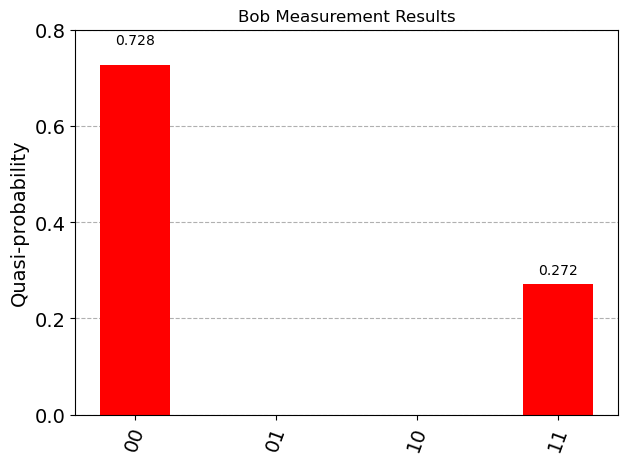

In [106]:
# Initialize an array to store counts for different states for Bob's qubits
S_B = np.zeros([4])

# Count occurrences of different states based on measurement outcomes for Bob's qubits
for state in counts:
    if (state[2] == '0') and (state[3] == '0'):
        S_B[0] = S_B[0] + counts[state]
    if (state[2] == '0') and (state[3] == '1'):
        S_B[1] = S_B[1] + counts[state]
    if (state[2] == '1') and (state[3] == '0'):
        S_B[2] = S_B[2] + counts[state]
    if (state[2] == '1') and (state[3] == '1'):
        S_B[3] = S_B[3] + counts[state]

# Create a dictionary to store counts for specific states for Bob's qubits
count_Bob = {'00': S_B[0], '01': S_B[1], '10': S_B[2], '11': S_B[3]}

# Display information about the initial state and measurement results for Bob's qubits
print('The desired state:')
print('|φ> = α|00> + β|11>')
print('α = ', a)
print('β = ', b)
print('------------------------------------------------------')
print('Measurement results:')
print('|B1B2>= ', count_Bob)
print('The broadcasted state:')
print('|φ_Bob> = |B1B2>= α_b|00> + β_b|11>')
print('α_b = ', sqrt(count_Bob['00'] / m))
print('β_b = ', sqrt(count_Bob['11'] / m))

# Display a histogram of measurement outcomes for Bob's qubits
plot_histogram(count_Bob, title='Bob Measurement Results',color='#FF0000')

In [111]:
# Amplitude-damping noise model
# Create an empty noise model
noise_model = NoiseModel()

# Add Amplitude-damping error to channel qubits
error_qc = amplitude_damping_error(0.4, 0)
error_qt = amplitude_damping_error(0.4, 0)
CNOT_error = error_qt.tensor(error_qc)
noise_model.add_quantum_error(CNOT_error, 'cx', [0, 4])
noise_model.add_quantum_error(CNOT_error, 'cx', [1, 5])
noise_model.add_quantum_error(CNOT_error, 'cx', [2, 6])
noise_model.add_quantum_error(CNOT_error, 'cx', [3, 7])
# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7]
  Specific qubit errors: [('cx', (0, 4)), ('cx', (1, 5)), ('cx', (2, 6)), ('cx', (3, 7))]


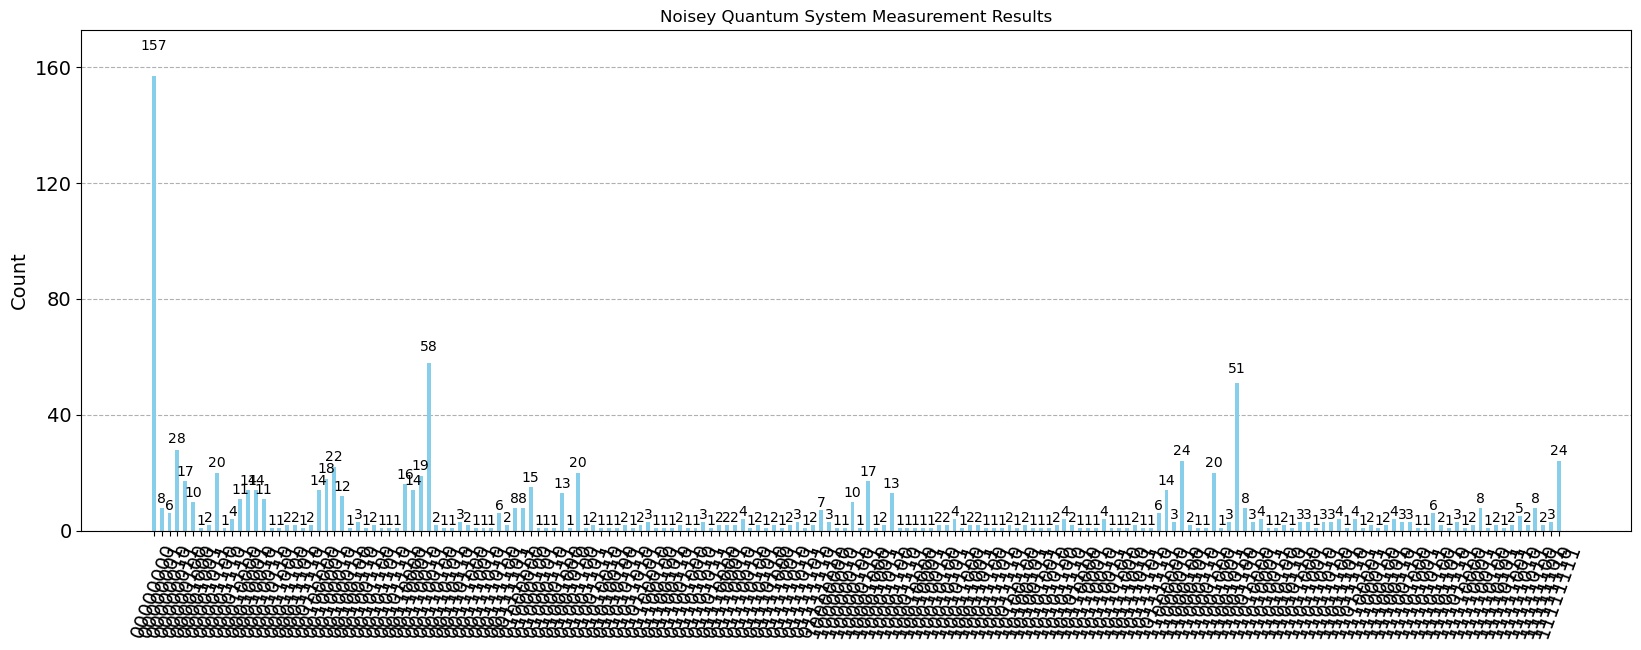

In [112]:
# Set the number of shots for the simulation
m = 1000

# Choose the QasmSimulator for the simulation with noise model
simulator = QasmSimulator(noise_model=noise_model)

# Transpile the quantum circuit for execution on the simulator
circ = transpile(Qc, simulator)

# Run the simulation with the specified number of shots
result = simulator.run(circ, shots=m).result()

# Obtain the measurement outcomes and their counts
counts = result.get_counts(circ)

# Display the histogram of measurement outcomes
# You can adjust the figure size using the second argument in plot_histogram
# [20, 6.5] specifies the width and height of the figure
plot_histogram(counts, [20, 6.5],title='Noisey Quantum System Measurement Results',color='skyblue')

|φ> = α|00> + β|11>
α =  0.8660254037844386
β =  0.5000000000000001
------------------------------------------------------
Measurement results:
|C1C2>=  {'00': 524.0, '01': 117.0, '10': 106.0, '11': 253.0}
0.524 , 0.117 , 0.106 , 0.253


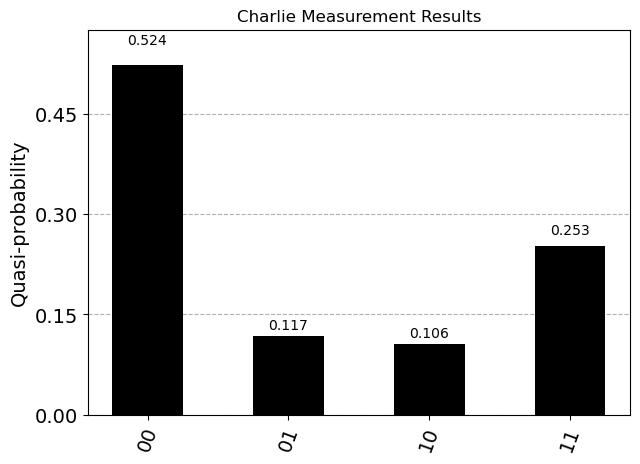

In [113]:
# Initialize an array to store counts for different states
S_C = np.zeros([4])

# Count occurrences of different states based on measurement outcomes
for state in counts:
    if (state[0] == '0') and (state[1] == '0'):
        S_C[0] = S_C[0] + counts[state]
    if (state[0] == '0') and (state[1] == '1'):
        S_C[1] = S_C[1] + counts[state]
    if (state[0] == '1') and (state[1] == '0'):
        S_C[2] = S_C[2] + counts[state]
    if (state[0] == '1') and (state[1] == '1'):
        S_C[3] = S_C[3] + counts[state]

# Create a dictionary to store counts for specific states
count_Charlie = {'00': S_C[0], '01': S_C[1], '10': S_C[2], '11': S_C[3]}

# Display information about the initial state and measurement results
print('|φ> = α|00> + β|11>')
print('α = ', a)
print('β = ', b)
print('------------------------------------------------------')
print('Measurement results:')
print('|C1C2>= ', count_Charlie)
print(count_Charlie['00'] / m,',',count_Charlie['01'] / m,',',count_Charlie['10'] / m,',',count_Charlie['11'] / m)
# Display a histogram of measurement outcomes for Charlie's qubits
plot_histogram(count_Charlie, title='Charlie Measurement Results',color='#000000')


The desired state:
|φ> = α|00> + β|11>
α =  0.8660254037844386
β =  0.5000000000000001
------------------------------------------------------
Measurement results:
|B1B2>=  {'00': 496.0, '01': 122.0, '10': 134.0, '11': 248.0}
0.496 , 0.122 , 0.134 , 0.248


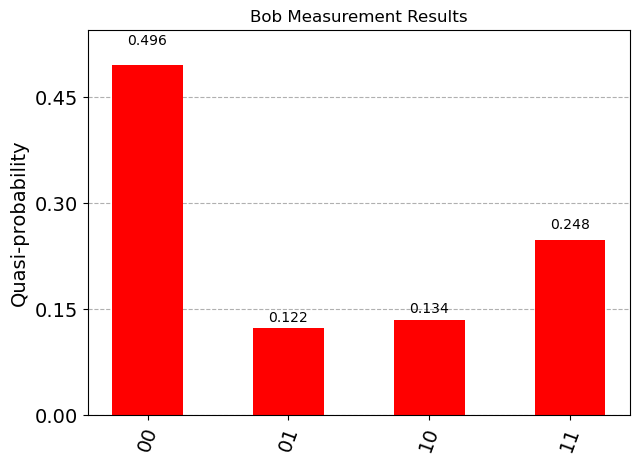

In [114]:
# Initialize an array to store counts for different states for Bob's qubits
S_B = np.zeros([4])

# Count occurrences of different states based on measurement outcomes for Bob's qubits
for state in counts:
    if (state[2] == '0') and (state[3] == '0'):
        S_B[0] = S_B[0] + counts[state]
    if (state[2] == '0') and (state[3] == '1'):
        S_B[1] = S_B[1] + counts[state]
    if (state[2] == '1') and (state[3] == '0'):
        S_B[2] = S_B[2] + counts[state]
    if (state[2] == '1') and (state[3] == '1'):
        S_B[3] = S_B[3] + counts[state]

# Create a dictionary to store counts for specific states for Bob's qubits
count_Bob = {'00': S_B[0], '01': S_B[1], '10': S_B[2], '11': S_B[3]}

# Display information about the initial state and measurement results for Bob's qubits
print('The desired state:')
print('|φ> = α|00> + β|11>')
print('α = ', a)
print('β = ', b)
print('------------------------------------------------------')
print('Measurement results:')
print('|B1B2>= ', count_Bob)
print(count_Bob['00'] / m,',',count_Bob['01'] / m,',',count_Bob['10'] / m,',',count_Bob['11'] / m)
# Display a histogram of measurement outcomes for Bob's qubits
plot_histogram(count_Bob, title='Bob Measurement Results',color='#FF0000')

In [119]:
# Phase-damping noise model
# Create an empty noise model
noise_model = NoiseModel()

# Add Amplitude-damping error to channel qubits
error_qc = phase_damping_error(0.4, 0)
error_qt = phase_damping_error(0.4, 0)
CNOT_error = error_qt.tensor(error_qc)
noise_model.add_quantum_error(CNOT_error, 'cx', [0, 4])
noise_model.add_quantum_error(CNOT_error, 'cx', [1, 5])
noise_model.add_quantum_error(CNOT_error, 'cx', [2, 6])
noise_model.add_quantum_error(CNOT_error, 'cx', [3, 7])
# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7]
  Specific qubit errors: [('cx', (0, 4)), ('cx', (1, 5)), ('cx', (2, 6)), ('cx', (3, 7))]


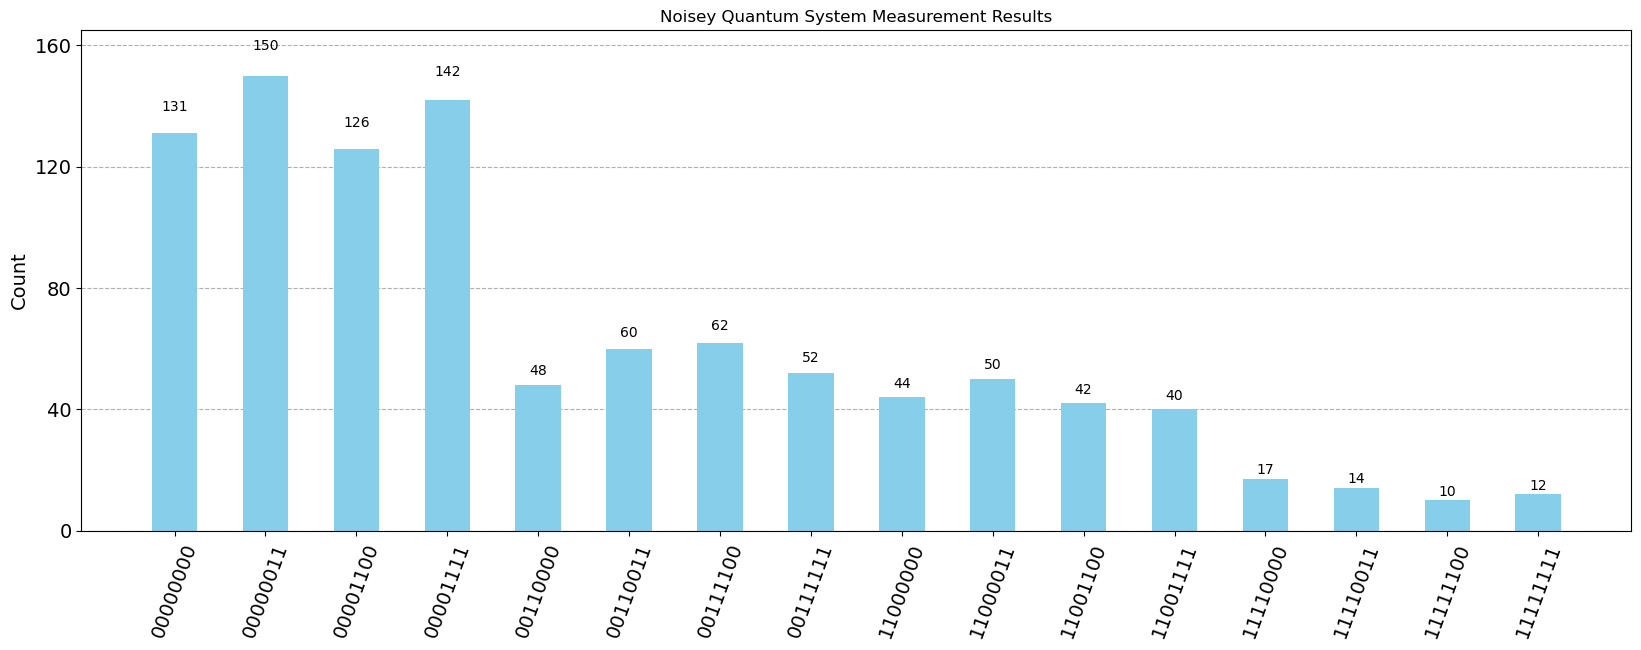

In [120]:
# Set the number of shots for the simulation
m = 1000

# Choose the QasmSimulator for the simulation with noise model
simulator = QasmSimulator(noise_model=noise_model)

# Transpile the quantum circuit for execution on the simulator
circ = transpile(Qc, simulator)

# Run the simulation with the specified number of shots
result = simulator.run(circ, shots=m).result()

# Obtain the measurement outcomes and their counts
counts = result.get_counts(circ)

# Display the histogram of measurement outcomes
# You can adjust the figure size using the second argument in plot_histogram
# [20, 6.5] specifies the width and height of the figure
plot_histogram(counts, [20, 6.5],title='Noisey Quantum System Measurement Results',color='skyblue')

|φ> = α|00> + β|11>
α =  0.8660254037844386
β =  0.5000000000000001
------------------------------------------------------
Measurement results:
|C1C2>=  {'00': 771.0, '01': 0.0, '10': 0.0, '11': 229.0}
0.771 , 0.0 , 0.0 , 0.229


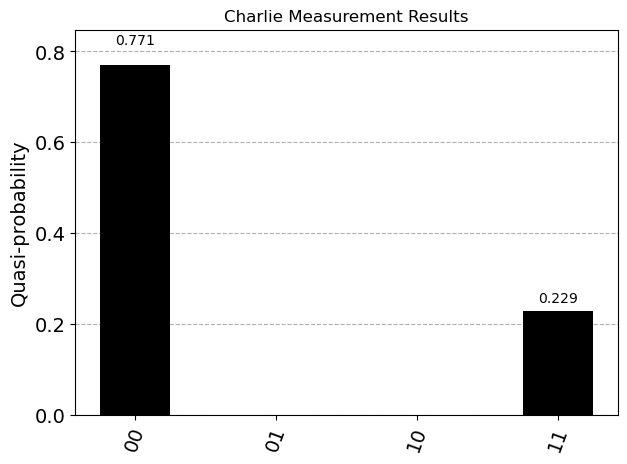

In [121]:
# Initialize an array to store counts for different states
S_C = np.zeros([4])

# Count occurrences of different states based on measurement outcomes
for state in counts:
    if (state[0] == '0') and (state[1] == '0'):
        S_C[0] = S_C[0] + counts[state]
    if (state[0] == '0') and (state[1] == '1'):
        S_C[1] = S_C[1] + counts[state]
    if (state[0] == '1') and (state[1] == '0'):
        S_C[2] = S_C[2] + counts[state]
    if (state[0] == '1') and (state[1] == '1'):
        S_C[3] = S_C[3] + counts[state]

# Create a dictionary to store counts for specific states
count_Charlie = {'00': S_C[0], '01': S_C[1], '10': S_C[2], '11': S_C[3]}

# Display information about the initial state and measurement results
print('|φ> = α|00> + β|11>')
print('α = ', a)
print('β = ', b)
print('------------------------------------------------------')
print('Measurement results:')
print('|C1C2>= ', count_Charlie)
print(count_Charlie['00'] / m,',',count_Charlie['01'] / m,',',count_Charlie['10'] / m,',',count_Charlie['11'] / m)
# Display a histogram of measurement outcomes for Charlie's qubits
plot_histogram(count_Charlie, title='Charlie Measurement Results',color='#000000')


The desired state:
|φ> = α|00> + β|11>
α =  0.8660254037844386
β =  0.5000000000000001
------------------------------------------------------
Measurement results:
|B1B2>=  {'00': 725.0, '01': 0.0, '10': 0.0, '11': 275.0}
0.725 , 0.0 , 0.0 , 0.275


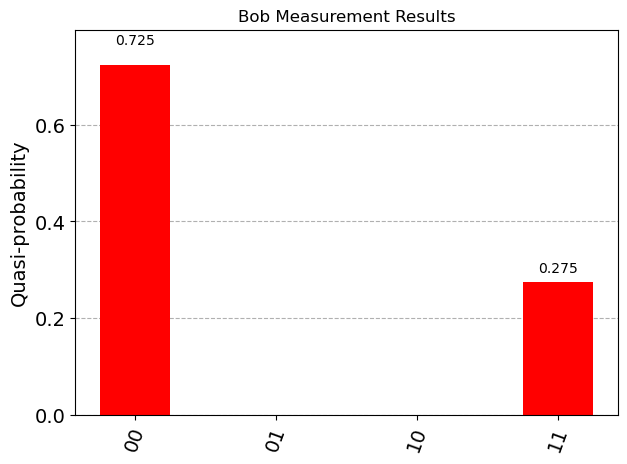

In [122]:
# Initialize an array to store counts for different states for Bob's qubits
S_B = np.zeros([4])

# Count occurrences of different states based on measurement outcomes for Bob's qubits
for state in counts:
    if (state[2] == '0') and (state[3] == '0'):
        S_B[0] = S_B[0] + counts[state]
    if (state[2] == '0') and (state[3] == '1'):
        S_B[1] = S_B[1] + counts[state]
    if (state[2] == '1') and (state[3] == '0'):
        S_B[2] = S_B[2] + counts[state]
    if (state[2] == '1') and (state[3] == '1'):
        S_B[3] = S_B[3] + counts[state]

# Create a dictionary to store counts for specific states for Bob's qubits
count_Bob = {'00': S_B[0], '01': S_B[1], '10': S_B[2], '11': S_B[3]}

# Display information about the initial state and measurement results for Bob's qubits
print('The desired state:')
print('|φ> = α|00> + β|11>')
print('α = ', a)
print('β = ', b)
print('------------------------------------------------------')
print('Measurement results:')
print('|B1B2>= ', count_Bob)
print(count_Bob['00'] / m,',',count_Bob['01'] / m,',',count_Bob['10'] / m,',',count_Bob['11'] / m)
# Display a histogram of measurement outcomes for Bob's qubits
plot_histogram(count_Bob, title='Bob Measurement Results',color='#FF0000')

In [127]:
# phase amplitude-damping noise model
# Create an empty noise model
noise_model = NoiseModel()

# Add Amplitude-damping error to channel qubits
error_qc = phase_amplitude_damping_error(0.4, 0.4)
error_qt = phase_amplitude_damping_error(0.4, 0.4)
CNOT_error = error_qt.tensor(error_qc)
noise_model.add_quantum_error(CNOT_error, 'cx', [0, 4])
noise_model.add_quantum_error(CNOT_error, 'cx', [1, 5])
noise_model.add_quantum_error(CNOT_error, 'cx', [2, 6])
noise_model.add_quantum_error(CNOT_error, 'cx', [3, 7])
# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7]
  Specific qubit errors: [('cx', (0, 4)), ('cx', (1, 5)), ('cx', (2, 6)), ('cx', (3, 7))]


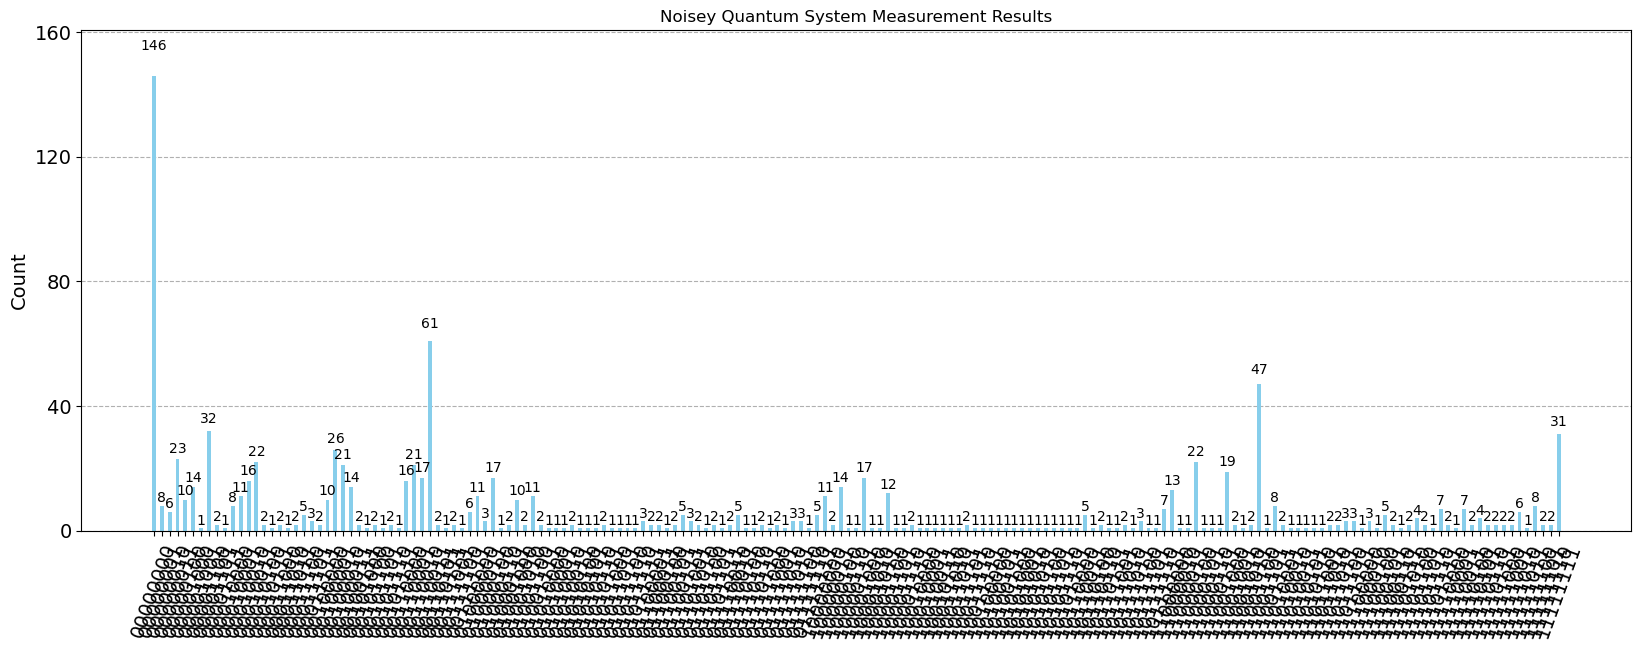

In [128]:
# Set the number of shots for the simulation
m = 1000

# Choose the QasmSimulator for the simulation with noise model
simulator = QasmSimulator(noise_model=noise_model)

# Transpile the quantum circuit for execution on the simulator
circ = transpile(Qc, simulator)

# Run the simulation with the specified number of shots
result = simulator.run(circ, shots=m).result()

# Obtain the measurement outcomes and their counts
counts = result.get_counts(circ)

# Display the histogram of measurement outcomes
# You can adjust the figure size using the second argument in plot_histogram
# [20, 6.5] specifies the width and height of the figure
plot_histogram(counts, [20, 6.5],title='Noisey Quantum System Measurement Results',color='skyblue')

|φ> = α|00> + β|11>
α =  0.8660254037844386
β =  0.5000000000000001
------------------------------------------------------
Measurement results:
|C1C2>=  {'00': 525.0, '01': 124.0, '10': 111.0, '11': 240.0}
0.525 , 0.124 , 0.111 , 0.24


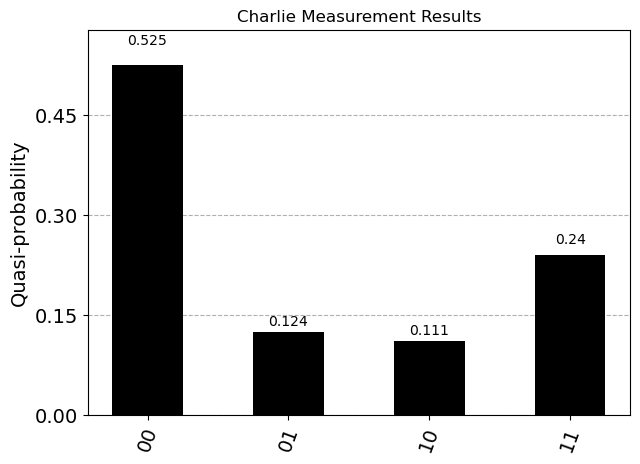

In [129]:
# Initialize an array to store counts for different states
S_C = np.zeros([4])

# Count occurrences of different states based on measurement outcomes
for state in counts:
    if (state[0] == '0') and (state[1] == '0'):
        S_C[0] = S_C[0] + counts[state]
    if (state[0] == '0') and (state[1] == '1'):
        S_C[1] = S_C[1] + counts[state]
    if (state[0] == '1') and (state[1] == '0'):
        S_C[2] = S_C[2] + counts[state]
    if (state[0] == '1') and (state[1] == '1'):
        S_C[3] = S_C[3] + counts[state]

# Create a dictionary to store counts for specific states
count_Charlie = {'00': S_C[0], '01': S_C[1], '10': S_C[2], '11': S_C[3]}

# Display information about the initial state and measurement results
print('|φ> = α|00> + β|11>')
print('α = ', a)
print('β = ', b)
print('------------------------------------------------------')
print('Measurement results:')
print('|C1C2>= ', count_Charlie)
print(count_Charlie['00'] / m,',',count_Charlie['01'] / m,',',count_Charlie['10'] / m,',',count_Charlie['11'] / m)
# Display a histogram of measurement outcomes for Charlie's qubits
plot_histogram(count_Charlie, title='Charlie Measurement Results',color='#000000')


The desired state:
|φ> = α|00> + β|11>
α =  0.8660254037844386
β =  0.5000000000000001
------------------------------------------------------
Measurement results:
|B1B2>=  {'00': 486.0, '01': 119.0, '10': 141.0, '11': 254.0}
0.486 , 0.119 , 0.141 , 0.254


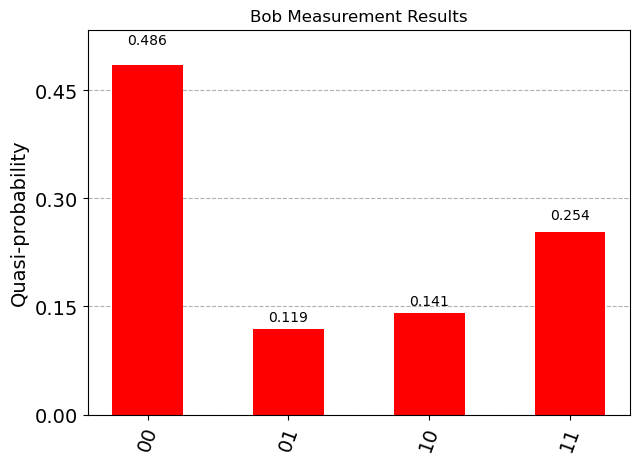

In [130]:
# Initialize an array to store counts for different states for Bob's qubits
S_B = np.zeros([4])

# Count occurrences of different states based on measurement outcomes for Bob's qubits
for state in counts:
    if (state[2] == '0') and (state[3] == '0'):
        S_B[0] = S_B[0] + counts[state]
    if (state[2] == '0') and (state[3] == '1'):
        S_B[1] = S_B[1] + counts[state]
    if (state[2] == '1') and (state[3] == '0'):
        S_B[2] = S_B[2] + counts[state]
    if (state[2] == '1') and (state[3] == '1'):
        S_B[3] = S_B[3] + counts[state]

# Create a dictionary to store counts for specific states for Bob's qubits
count_Bob = {'00': S_B[0], '01': S_B[1], '10': S_B[2], '11': S_B[3]}

# Display information about the initial state and measurement results for Bob's qubits
print('The desired state:')
print('|φ> = α|00> + β|11>')
print('α = ', a)
print('β = ', b)
print('------------------------------------------------------')
print('Measurement results:')
print('|B1B2>= ', count_Bob)
print(count_Bob['00'] / m,',',count_Bob['01'] / m,',',count_Bob['10'] / m,',',count_Bob['11'] / m)
# Display a histogram of measurement outcomes for Bob's qubits
plot_histogram(count_Bob, title='Bob Measurement Results',color='#FF0000')